In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
#приводим данные к нормальному виду

df['y'].groupby(df['y']).count()
df2=df.copy()
df2.drop(['default'],axis=1, inplace=True)
df2.groupby(['y','pdays']).size()
df2.drop(['pdays'],axis=1, inplace=True)
df2.groupby('age',sort=True)['age'].count()
df2.groupby(['y','balance'],sort=True)['balance'].count()
df2.groupby(['y','duration'],sort=True)['duration'].count()
df3 = df2[df2['campaign'] < 33]
df3.groupby(['y','campaign'],sort=True)['campaign'].count()
df3.groupby(['y','previous'],sort=True)['previous'].count()
df4 = df3[df3['previous'] < 31]
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)
    bool_columns = ['housing', 'loan', 'y']
    
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)
    
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,y_new
0,58,2143,5,261,1,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,33,2,5,76,1,0,0,1,0,0,...,1,0,0,0,0,0,1,1,1,0
3,47,1506,5,92,1,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,33,1,5,198,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [4]:
# создаем модель

In [5]:
X = df4.drop(['y_new'],axis=1)
y = df4['y_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [6]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from collections import Counter
print(y_pred)
Counter(y_pred).keys() 
print(y_pred.shape, y_test.shape)

[0 0 0 ... 0 0 0]
(9033,) (9033,)


In [8]:
confusion_matrix = [[0,0], [0,0]]
confusion_matrix

[[0, 0], [0, 0]]

In [9]:
for i, j in zip(y_pred, y_test):
    if i == 1:
        if j == 1:
            confusion_matrix[0][0] += 1
        else:
            confusion_matrix[0][1] += 1
            
    if i == 0:
        if j == 0:
            confusion_matrix[1][1] += 1
        else:
            confusion_matrix[1][0] += 1
            

In [10]:
Accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1]) / len(y_train)
Precision = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])
Recall =  confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0])

TNR = confusion_matrix[1][1] / (confusion_matrix[1][1]+confusion_matrix[0][1] )                                                                        
#ROC-AUC
                                                                                    
print(Accuracy, Precision, Recall, TNR)

0.2216286536758193 0.5652173913043478 0.22807017543859648 0.9761006289308176


In [11]:
def do_confusion_matrix(a, b):
    confusion_matrix_ = [[0,0], [0,0]]
    for i, j in zip(a, b):
        if i == 1:
            if j == 1:
                confusion_matrix_[0][0] += 1
            else:
                confusion_matrix_[0][1] += 1
            
        if i == 0:
            if j == 0:
                confusion_matrix_[1][1] += 1
            else:
                confusion_matrix_[1][0] += 1
            
    return confusion_matrix_
            

In [12]:
def count_R_T(confusion_matrix_):
    R =  confusion_matrix_[0][0] / (confusion_matrix_[0][0] + confusion_matrix_[1][0])
    T = confusion_matrix_[1][1] / (confusion_matrix_[1][1]+confusion_matrix_[0][1] )   
    
    return (R, T)

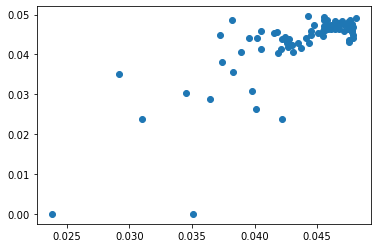

In [21]:
x = []
y = []
for t in range(100, len(y_pred)+1, 100):
    cnf_mtrx = do_confusion_matrix(y_pred[:t], y_train[:t])
    Recall, TNR = count_R_T(cnf_mtrx)
    x.append(1-TNR)
    y.append(Recall)
plt.scatter(x,y)
plt.show()